In [1]:
#패키지
import SimpleITK as sitk
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import pandas as pd


In [2]:
PATH_DATASET_CSV = '../Dataset/Dataset_with_path.csv'

df_dataset = pd.read_csv(PATH_DATASET_CSV)

In [3]:
df_dataset = df_dataset[['source','path','filename','group_maxinc','age']].dropna()

In [10]:
np.array(df_dataset[['source','path']])

array([['OASIS-3',
        '../Dataset/OASIS_BET/sub-OAS30001_sess-d0129_run-02_T1w.nii'],
       ['OASIS-3',
        '../Dataset/OASIS_BET/sub-OAS30001_sess-d0129_run-01_T1w.nii'],
       ['OASIS-3', '../Dataset/OASIS_BET/sub-OAS30002_ses-d0371_T1w.nii'],
       ...,
       ['ADNI', '../Dataset/ADNI_BET/I9329.nii'],
       ['ADNI', '../Dataset/ADNI_BET/I9530.nii'],
       ['ADNI', '../Dataset/ADNI_BET/I9856.nii']], dtype=object)

In [11]:
def read_dicom_file(source,filepath):
    """Read and load volume"""
    sitk_t1 = sitk.ReadImage(filepath)
    print('ORG_Direction',sitk_t1.GetDirection())
    #print('ORG_Origin',sitk_t1.GetOrigin())
    sitk_t1.SetDirection([1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0])
    #print('TOBE_Origin',sitk_t1.GetOrigin())
    print('TOBE_Direction',sitk_t1.GetDirection())

    image = sitk.GetArrayFromImage(sitk_t1)
    #oasis
    if source=='OASIS-3':
        image = image.transpose(1,2,0)
        image = ndimage.rotate(image,180,reshape=False)
        image = image[:,:,::-1]
    else:
        image = image.transpose(2,0,1)
    return image


def sample_stack(stack,rows=6,cols=6,start_with=10,show_every=5,subtitle='title'):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    plt.suptitle(subtitle)
    for i in range(rows*cols):
        ind = start_with = i*show_every
        ax[int(i / rows),int(i % rows)].set_title('slice %d'%ind)
        ax[int(i / rows),int(i % rows)].imshow(stack[:,:,ind],cmap='gray')
        ax[int(i / rows),int(i % rows)].axis('off')
    plt.show()

def preprocessing(image):
    return image

def process_scan(source, filepath):
    
    image = read_dicom_file(source, filepath)
    
    image = preprocessing(image)

    return image


In [16]:
dataset = np.array([process_scan(source,path) for source,path in np.array(df_dataset[['source','path']])])

ORG_Direction (-0.9968057647301506, 0.01341000329386422, -0.07873016708657689, -0.0073209902549148465, -0.9969945228528542, -0.07712538650880958, -0.07952779704246181, -0.07630264224172062, 0.9939080619183982)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
ORG_Direction (-0.9968057671751336, 0.01341201687007359, -0.07872979204789857, -0.007321003465773411, -0.996992560117898, -0.077150753276797, -0.07952776518076901, -0.07632792983591423, 0.9939061228873265)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
ORG_Direction (-0.9995461663725221, 0.005233288822769559, 0.02966604120668665, -0.0052309845750626565, -0.9999863062502887, 0.00015529131241329613, 0.02966644721515707, 3.823991848465304e-08, 0.9995598540776492)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
ORG_Direction (-0.9959643700063422, -0.0026492395161826486, -0.08971039275411008, 0.011716973072489345, -0.9948475431931839, -0.1007029198474763, -0.08898138131029723, -0.1013476557818285, 

KeyboardInterrupt: 

ORG_Direction (-0.9964307356683446, 0.04803450817024673, -0.06941523964191121, -0.05296102552274263, -0.9960717043475413, 0.0709668230101381, -0.06573369600913194, 0.07438982338348875, 0.9950604175311687)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(256, 176, 256)


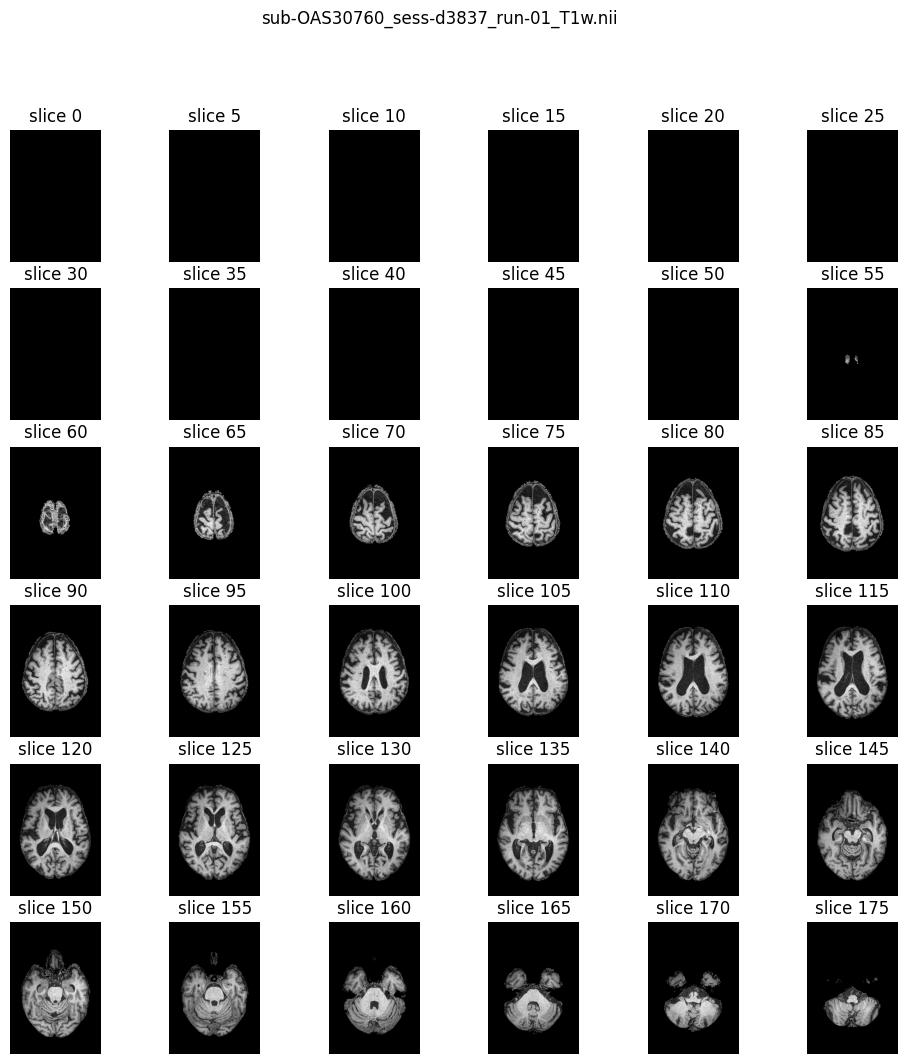

In [5]:
img_num=800
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)


ORG_Direction (-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(240, 160, 256)


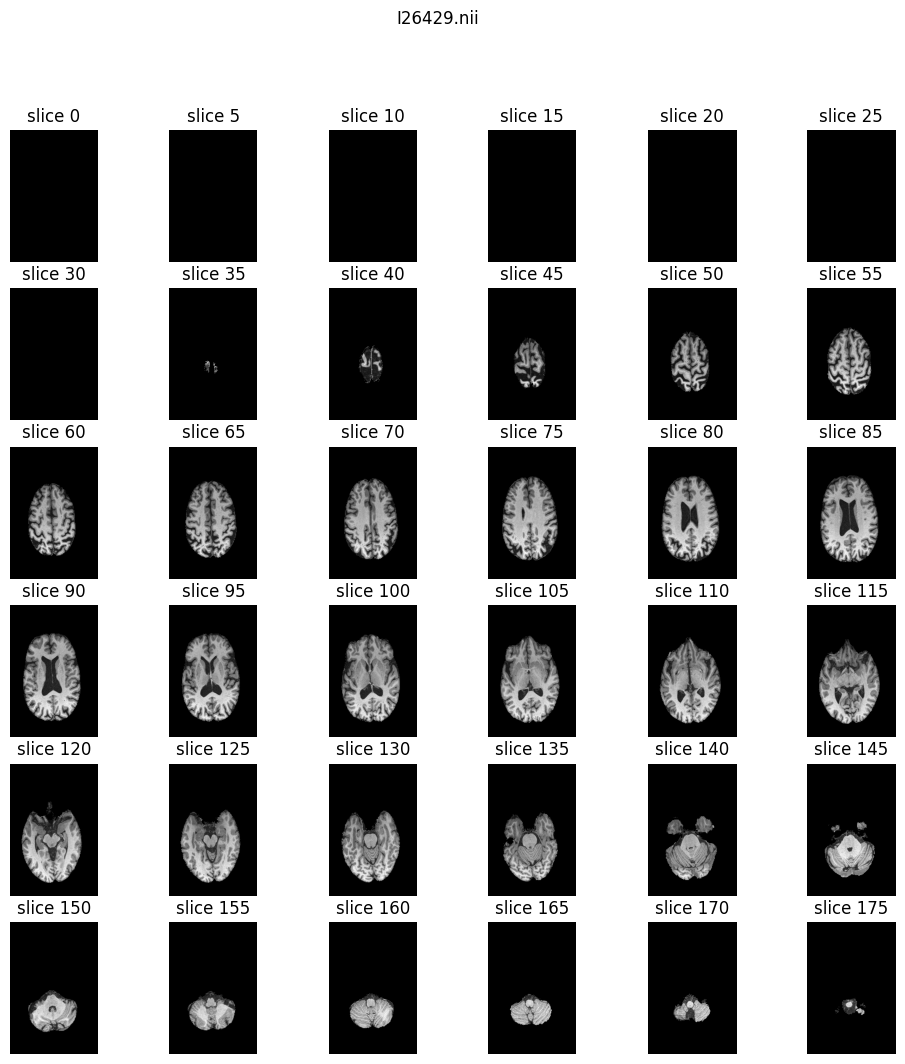

In [134]:
img_num=1280
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)
